In [1]:
# import libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# create dataset
X, y = make_classification(n_samples = 1000, n_classes = 2, random_state = 1)
# split into training & test datasets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [5]:
X.shape

(1000, 20)

In [7]:
# fit LDA model
lda = LinearDiscriminantAnalysis(n_components=1, store_covariance=True) # number of components for dimensionality reduction
X_r = lda.fit(trainX, trainy) # fit LinearDiscriminantAnalysis model using first 2 features and project data to maximize class separation
# calculate probability for being each class
lda_probs = lda.predict_proba(testX)
lda_probs = lda_probs[:, 1]

In [9]:
# fit logistic regression model
lr = LogisticRegression(solver='lbfgs')
lr.fit(trainX, trainy)
# predict probabilities
lr_probs = lr.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [ ]:
# evaluation methods - precision-recall, ROC curve, confusion matrix

In [11]:
# precision & recall
lda_precision, lda_recall, lda_thresh = precision_recall_curve(testy, lda_probs)
lr_precision, lr_recall, lr_thresh = precision_recall_curve(testy, lr_probs)

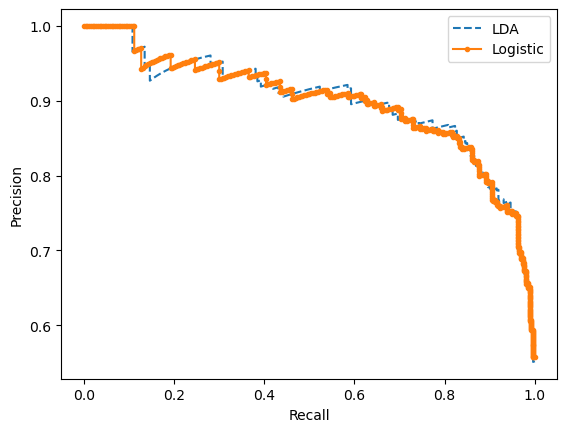

In [15]:
# plot the precision-recall-curve
plt.plot(lda_recall, lda_precision, linestyle='--', label='LDA')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

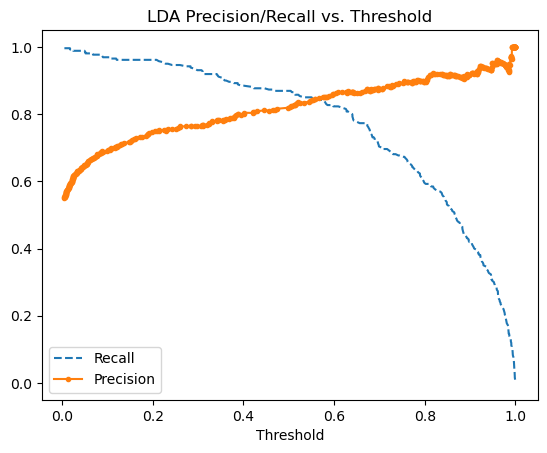

In [23]:
# plot LDA precision/recall vs threshold
plt.plot(lda_thresh, lda_recall[1:], linestyle='--', label='Recall')
plt.plot(lda_thresh, lda_precision[1:], marker='.', label='Precision')
plt.title("LDA Precision/Recall vs. Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [25]:
# 3 different threshold, precisions & recalls for LDA
print("LDA: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lda_thresh[50], lda_precision[50], lda_recall[50]))
print("LDA: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lda_thresh[200], lda_precision[200], lda_recall[200]))
print("LDA: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lda_thresh[400], lda_precision[400], lda_recall[400]))

LDA: threshold: 0.024, precision: 0.613, recall: 0.992
LDA: threshold: 0.514, precision: 0.827, recall: 0.862
LDA: threshold: 0.962, precision: 0.958, recall: 0.262


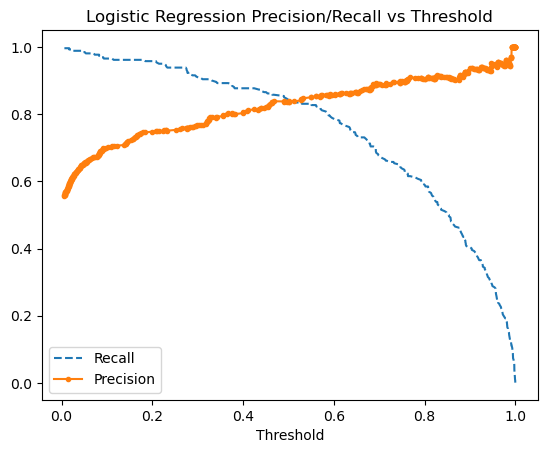

In [27]:
# plot Logistic Regression precision/recall vs threshold
plt.plot(lr_thresh, lr_recall[1:], linestyle='--', label='Recall')
plt.plot(lr_thresh, lr_precision[1:], marker='.', label='Precision')
plt.title("Logistic Regression Precision/Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [31]:
# 3 different threshold, precisions & recalls for Logistic Regression
print("Logistic Regression: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lr_thresh[50], lr_precision[50], lr_recall[50]))
print("Logistic Regression: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lr_thresh[200], lr_precision[200], lr_recall[200]))
print("Logistic Regression: threshold: {:.3f}, precision: {:.3f}, recall: {:.3f}".format(lr_thresh[400], lr_precision[400], lr_recall[400]))

Logistic Regression: threshold: 0.027, precision: 0.618, recall: 0.988
Logistic Regression: threshold: 0.490, precision: 0.838, recall: 0.858
Logistic Regression: threshold: 0.962, precision: 0.955, recall: 0.242


In [ ]:
# ROC curves

In [39]:
# for LDA
# calculate roc auc scores
lda_auc = roc_auc_score(testy, lda_probs)
# calculate f1 score base
lda_f1 = f1_score(testy, lda.predict(testX))
lda_fpr, lda_tpr, lda_auc_thres = roc_curve(testy, lda_probs)
print('LDA: \nF1 score:%.3f, ROC AUC=%.3f'%(lda_f1, lda_auc))

LDA: 
F1 score:0.843, ROC AUC=0.905


In [49]:
# for logistic regression
# calculate roc auc scores
lr_auc = roc_auc_score(testy, lr_probs)
# calculate f1 score base
lr_f1 = f1_score(testy, lr.predict(testX))
lr_fpr, lr_tpr, lr_auc_thres = roc_curve(testy, lr_probs)
print('Logistic Regression: \nF1 score:%.3f, ROC AUC=%.3f'%(lr_f1, lr_auc))

Logistic Regression: 
F1 score:0.841, ROC AUC=0.903


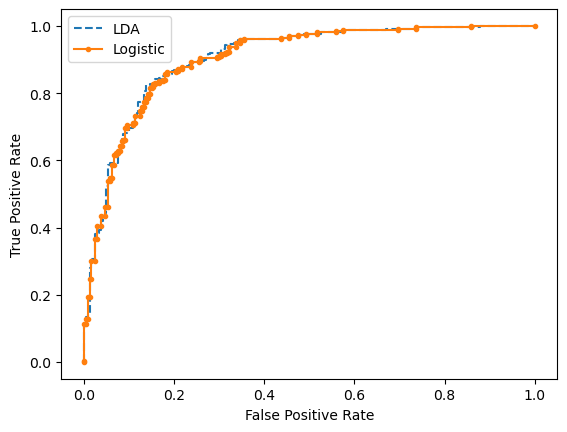

In [51]:
# plot the roc curve for the model
plt.plot(lda_fpr, lda_tpr, linestyle='--', label='LDA')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [53]:
# 3 different threshold, false positive rate & true positive rate 
# for LDA
print("LDA: threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lda_auc_thres[5], lda_fpr[5],lda_tpr[5]))
print("LDA: threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lda_auc_thres[65], lda_fpr[65],lda_tpr[65]))
print("LDA: threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lda_auc_thres[100], lda_fpr[100],lda_tpr[100]))


LDA: threshold: 0.989, false positive: 0.008, true positive: 0.135
LDA: threshold: 0.515, false positive: 0.196, true positive: 0.858
LDA: threshold: 0.213, false positive: 0.346, true positive: 0.962


In [55]:
# 3 different threshold, false positive rate & true positive rate 
# for Logistic Regression
print("Logistic Regression： threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lr_auc_thres[5], lr_fpr[5],lr_tpr[5]))
print("Logistic Regression： threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lr_auc_thres[65], lr_fpr[65],lr_tpr[65]))
print("Logistic Regression： threshold: {:.3f}, false positive: {:.3f}, true positive: {:.3f}".format(lr_auc_thres[100], lr_fpr[100],lr_tpr[100]))

Logistic Regression： threshold: 0.990, false positive: 0.008, true positive: 0.127
Logistic Regression： threshold: 0.528, false positive: 0.175, true positive: 0.835
Logistic Regression： threshold: 0.184, false positive: 0.354, true positive: 0.962


In [ ]:
# confusion matrix

In [57]:
# confusion matrix for LDA
lda_tn, lda_fp, lda_fn, lda_tp = confusion_matrix(testy, lda.predict(testX)).ravel()/len(testy)
print("Confusion matrix for LDA --- tn: {}, fp: {}, fn: {}, tp: {}".format(lda_tn, lda_fp, lda_fn, lda_tp))


Confusion matrix for LDA --- tn: 0.38, fp: 0.1, fn: 0.068, tp: 0.452


In [61]:
# confusion matrix for Logistic Regression
lr_tn, lr_fp, lr_fn, lr_tp = confusion_matrix(testy, lda.predict(testX)).ravel()/len(testy)
print("Confusion matrix for LDA --- tn: {}, fp: {}, fn: {}, tp: {}".format(lr_tn, lr_fp, lr_fn, lr_tp))

Confusion matrix for LDA --- tn: 0.38, fp: 0.1, fn: 0.068, tp: 0.452
